In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_df = pd.read_csv("./output/loan-interest-rates_EN.csv",index_col=False)
deposit_df = pd.read_csv("./output/deposit-interest-rates_EN.csv",index_col=False)

In [3]:
def convert_date(txt):
    return datetime.strptime(txt,"%d %b %Y")

In [4]:
loan_df['datetime'] = loan_df['Date'].apply(convert_date)

In [5]:
mor_df = loan_df[['datetime','MOR','bank']].astype({"bank":"string"}).dropna()

In [6]:
mor_df_average = mor_df[['datetime','MOR']].groupby(['datetime']).agg('mean').reset_index()

<Figure size 1600x900 with 0 Axes>

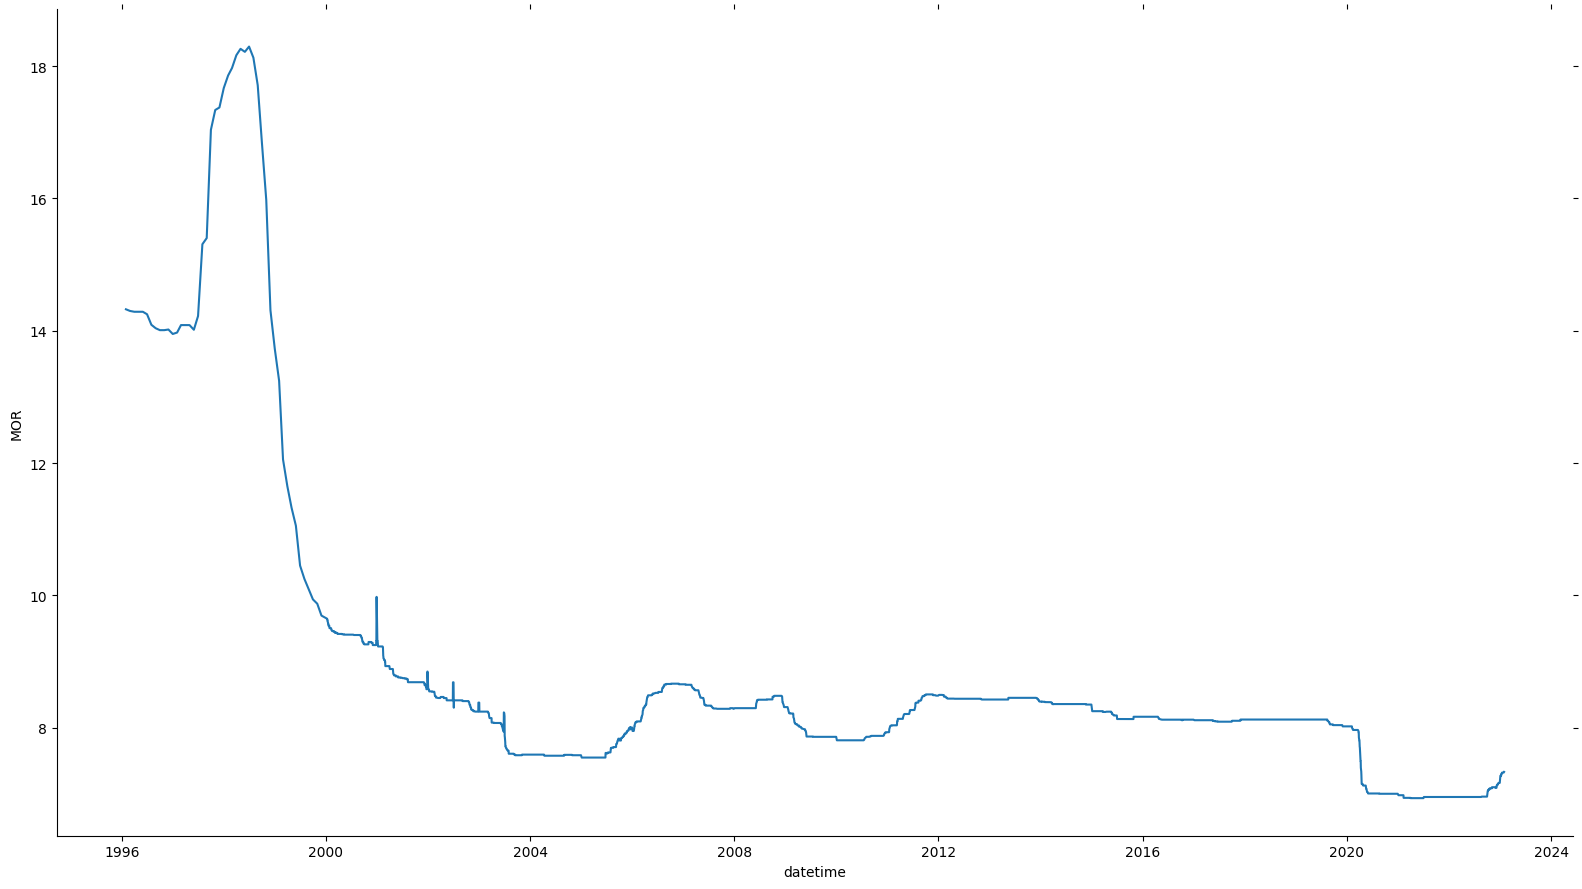

In [7]:
plt.figure(figsize=(16, 9))
ax = sns.relplot(
    data=mor_df_average, kind="line",
    x="datetime", y="MOR",
    height=9,aspect=1.77
)
ax.tick_params(axis='both',which='both',reset=True,grid_alpha=1,grid_linewidth=1)
plt.savefig("loan-interest-rate-mor-average.png")

In [8]:
filtered_banks = [
    'Kasikornbank',
    'Krung Thai Bank',
    'The Siam Commercial Bank',
    'TMBThanachart Bank Public Company Limited',
    'Bangkok Metropolitan Bank',
    'Thanachart Bank',
    'Land and Houses  Bank',
    'Kiatnakin Bank',
    'Bank of Ayudhya',
    'TISCO Bank',
    
]

In [9]:
mor_df_filterd = mor_df[mor_df['bank'].isin(filtered_banks)]

<Figure size 1600x900 with 0 Axes>

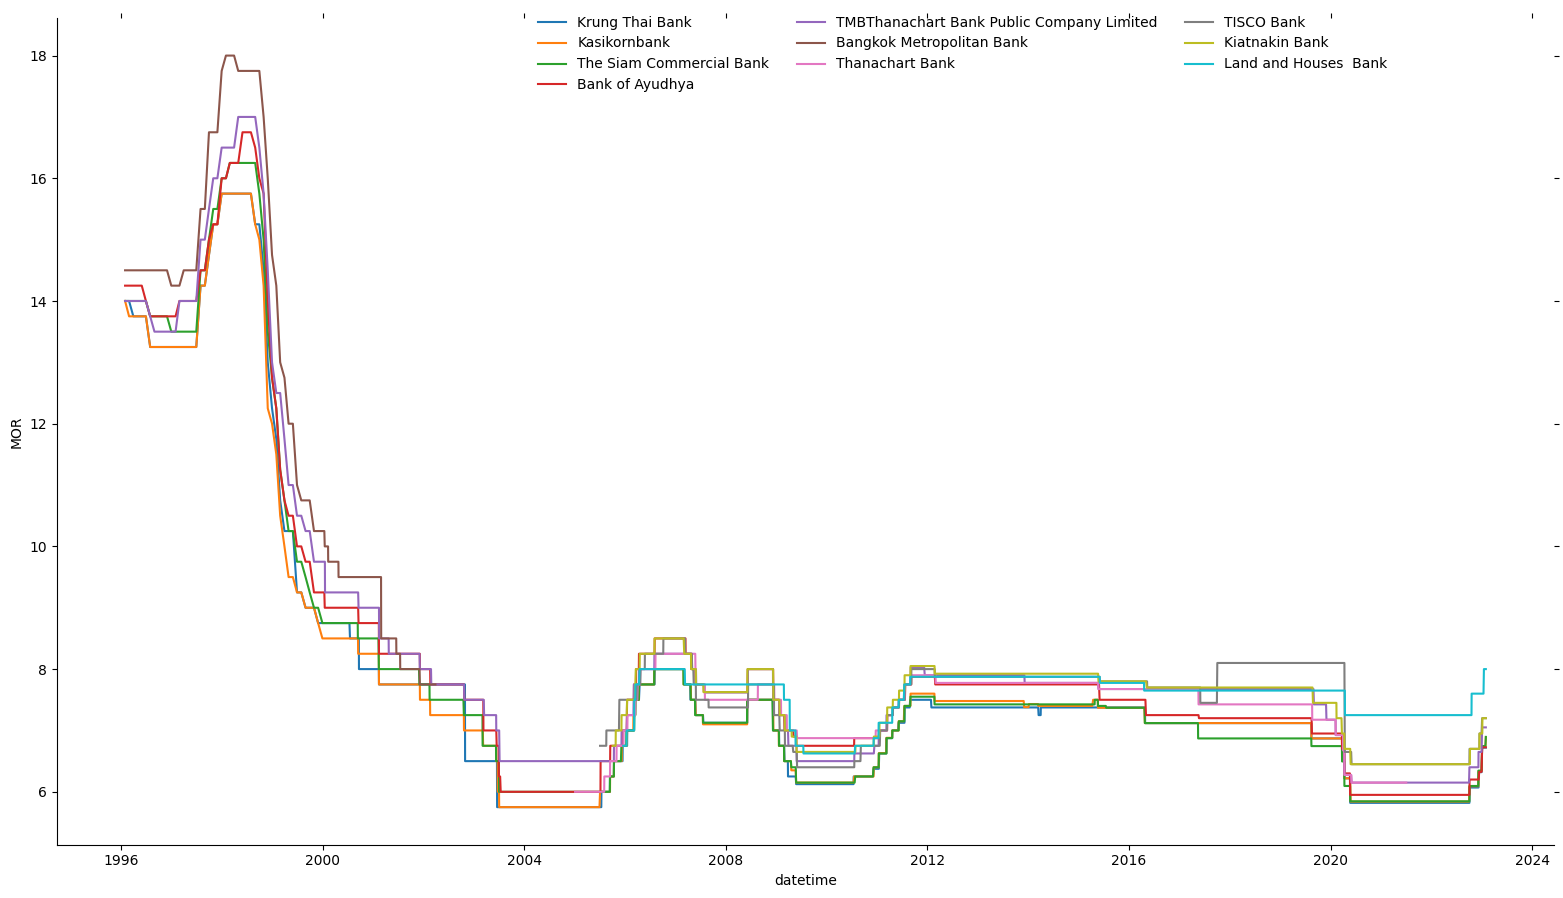

In [10]:
# This step takes some time (5-10 minutes)
plt.figure(figsize=(16, 9))
ax = sns.relplot(
    data=mor_df_filterd, kind="line",
    x="datetime", y="MOR", hue="bank",
    legend='brief',
    height=9,aspect=1.77
)
sns.move_legend(ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
# ax.despine()
ax.tick_params(axis='both',which='both',reset=True,grid_alpha=1,grid_linewidth=1)
plt.savefig("loan-interest-rate-mor-per-banks.png")